Fittando curvas aos graficos digitalizados.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
xl = pd.ExcelFile("Graficos Digitalizados.xlsx")
sheets = xl.sheet_names
# ['Fosforo - G1',
#  'pH - G1',
#  'DBO - G4',
#  'N - G4',
#  'Temperatura - G5',
#  'Turbidez - G3',
#  'Residuos - G2',
#  'OD - G2',
#  'Coliformes - G3']
fosforo = xl.parse(sheets[0])
ph = xl.parse(sheets[1])
dbo = xl.parse(sheets[2])
n = xl.parse(sheets[3])
temperatura = xl.parse(sheets[4])
turbidez = xl.parse(sheets[5])
turbidez.sort_values(turbidez.columns[0], inplace=True)
residuos = xl.parse(sheets[6])
residuos.sort_values(residuos.columns[0], inplace=True)
od = xl.parse(sheets[7])
coliformes = xl.parse(sheets[8])

coliformes = coliformes.iloc[:, 0:2]
od = od.tail(-1)
od = od.iloc[:, 1:]
# coliformes = coliformes.astype('float64').sort_values('x')

cols = {'fosforo':fosforo, 'ph':ph, 'dbo':dbo, 'n':n, 'temperatura':temperatura, 'turbidez':turbidez, 'residuos':residuos, 'od':od, 'coliformes':coliformes}
funcs = {}

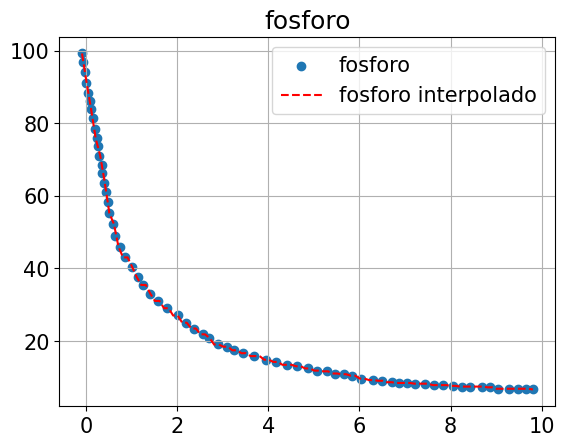

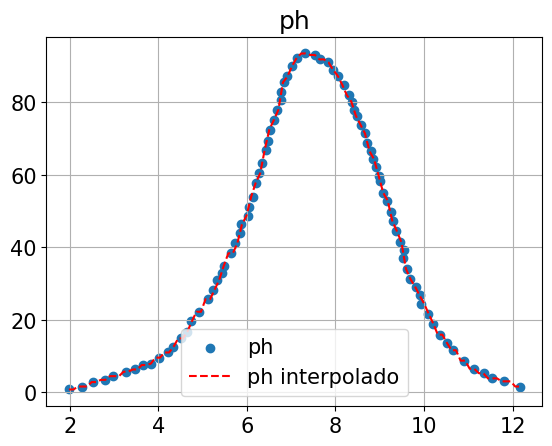

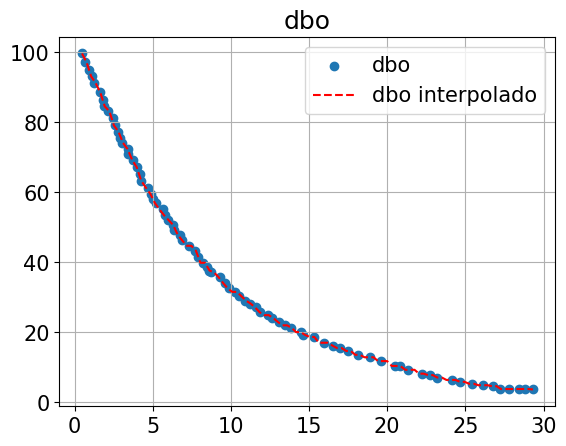

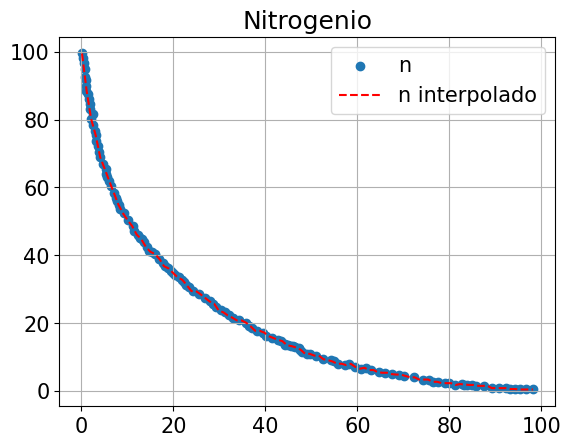

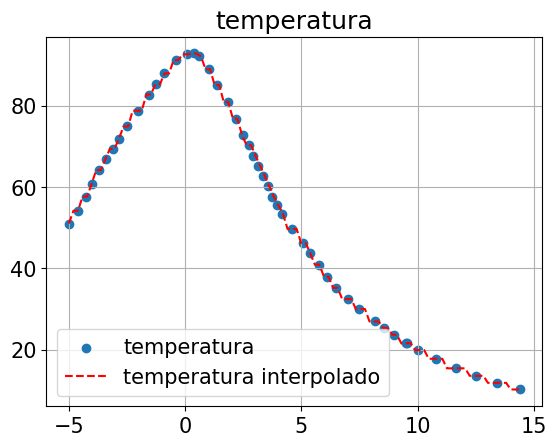

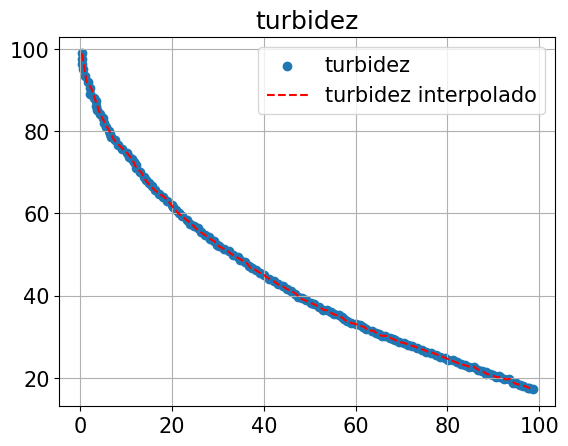

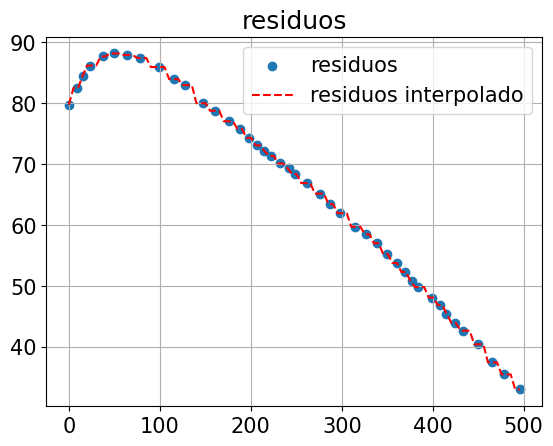

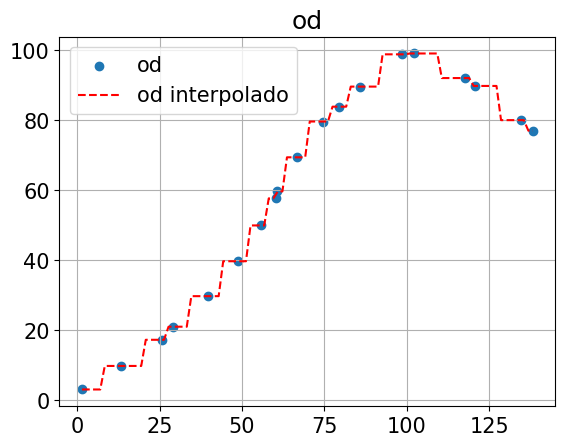

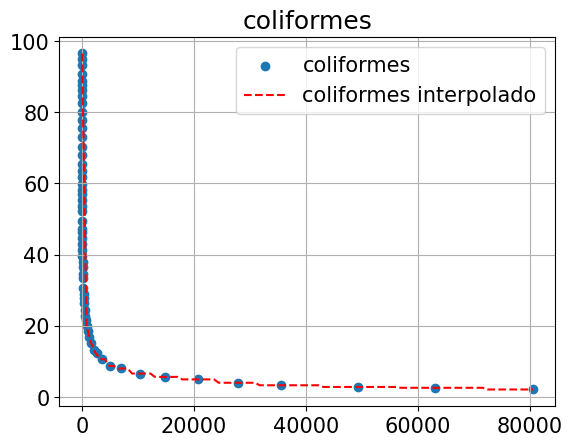

In [98]:
def get_q(nome,valor):
    df = cols[nome]
    df['Difference'] = abs(df.iloc[:,0] - valor)
    # Sort the DataFrame by the difference in ascending order
    df_sorted = df.sort_values('Difference')
    # Get the line where the difference is the smallest (closest approximation)
    return df_sorted.iloc[0,1]

#plottar cols e interpolacoes com a get_q
for col in cols:
    #setting font
    plt.rcParams.update({'font.size': 15})
    df = cols[col]
    #plot df
    plt.scatter(df.iloc[:,0], df.iloc[:,1], label=col)#scatter
    #plot interpolacao
    x = np.linspace(df.iloc[0,0], df.iloc[-1,0], 100)
    y = [get_q(col, i) for i in x]
    plt.plot(x, y, label=col + ' interpolado', linestyle='--',color='red')
    plt.title(col)
    if(col == 'n'):
        plt.title('Nitrogenio')
    plt.grid()
    plt.legend()
    plt.show()



graficos dos nossos pontos

In [99]:
dicionario_colhidos = {'coliformes': 34133.333,'ph': 6,'dbo': 85,'n': 12.25,'fosforo': 42.372,'temperatura': 0.4,'turbidez': 49.44,'residuos': 2918,'od': 19.9}
weights = {"fosforo":0.1, "ph":0.12, "dbo":0.10, "n":0.10, "temperatura":0.10, "turbidez":0.08, "residuos":0.08, "od":0.17, "coliformes":0.15}

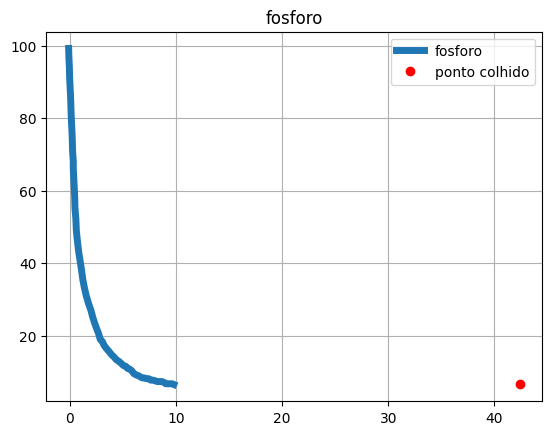

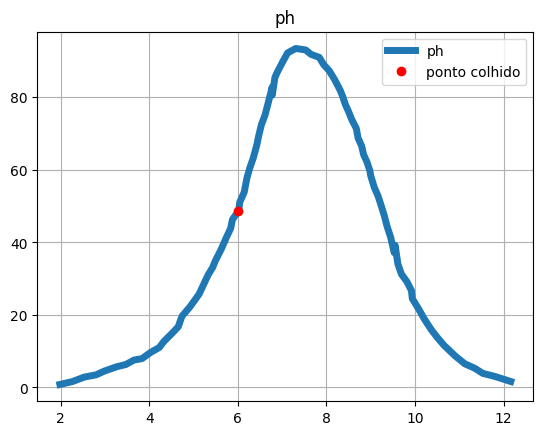

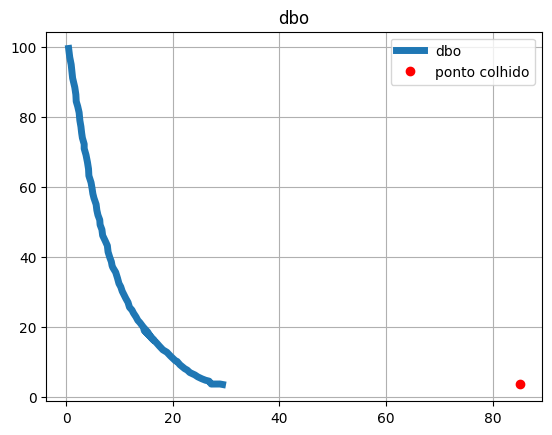

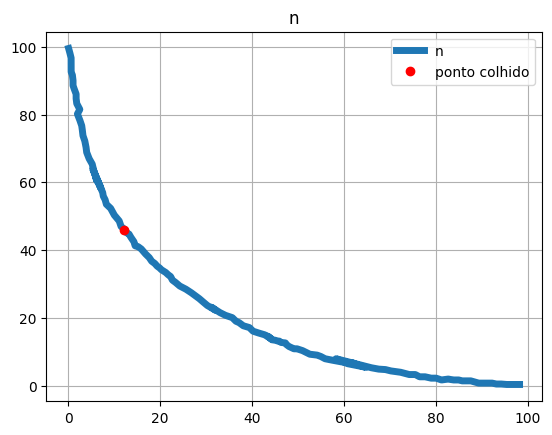

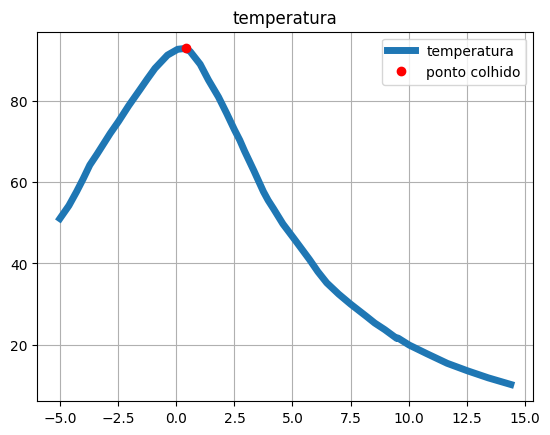

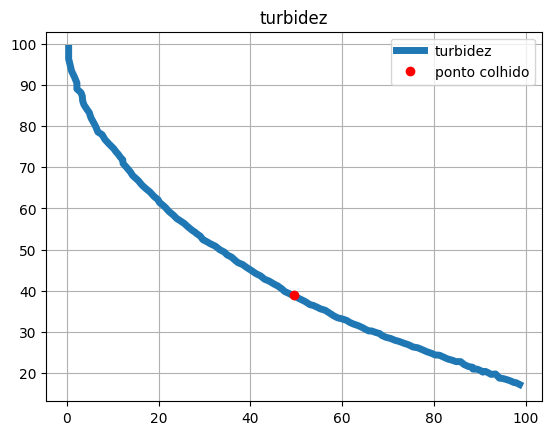

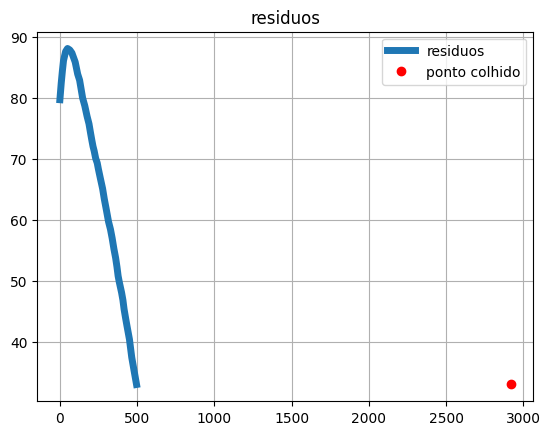

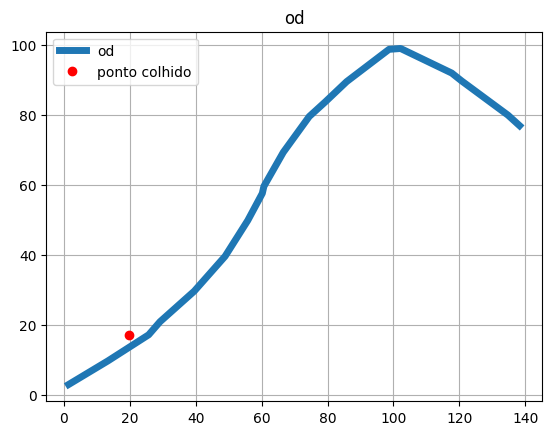

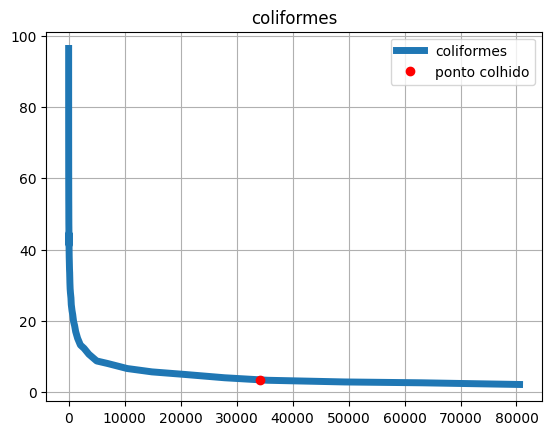

In [100]:
#plottar os pontos colhidos nos graficos
for col in cols:
    df = cols[col]
    #plot df
    #fontsize
    plt.rcParams.update({'font.size': 10})
    plt.plot(df.iloc[:,0], df.iloc[:,1], label=col,linewidth=5)
    plt.plot(dicionario_colhidos[col], get_q(col, dicionario_colhidos[col]), 'ro', label='ponto colhido')
    plt.title(col)
    plt.grid()
    plt.legend()
    plt.savefig('images/'+col + '_colhido.png')
    plt.show()
    

In [101]:
# coliforme totais = 34.133,333 
# pH: 6 
# DBO: 85 
# nitrogênio na amostra = 12,25mg/L  
# Fosforo total = 0.353 (absorbância): 42,372 mg/L
# temperatura = 0.4  
# turbidez = 49.44 (diluido em 1:2)  
# solidos totais = 2918 mg/L 
# oxigênio dissolvido = 19.7  

iqa = 1
for key in dicionario_colhidos.keys():
    value = dicionario_colhidos[key]
    value = get_q(key, value)
    print(key, value)  
    iqa *= value**weights[key]
    
print(iqa) #coliformes totais e 


coliformes 3.301887
ph 48.77551
dbo 3.659423509
n 46.07190413
fosforo 6.6
temperatura 92.85714286
turbidez 38.86608
residuos 32.99451
od 17.2031530810156
17.398576660464872


In [102]:
df_1 = pd.read_excel('SPRA04850_2012_2016.xlsx')
df_2  = pd.read_excel('SPRA04850_2017_2022.xlsx')


filtrado_1  = df_1[['Data Coleta','Parametro','Valor','Unidade']]
filtrado_1['Data Coleta'] = filtrado_1['Data Coleta'].astype('datetime64[ns]')
filtrado_1['Data Coleta'] = filtrado_1['Data Coleta'].dt.strftime('%y-%m')
filtrado_1.sort_values(by=['Data Coleta'], inplace=True)

filtrado_2  = df_2[['Data Coleta','Parametro','Valor','Unidade']]
filtrado_2['Data Coleta'] = filtrado_2['Data Coleta'].astype('datetime64[ns]')
filtrado_2['Data Coleta'] = filtrado_2['Data Coleta'].dt.strftime('%y-%m')
filtrado_2.sort_values(by=['Data Coleta'], inplace=True)


filtrado = pd.concat([filtrado_1, filtrado_2])

filtrado.sort_values(by=['Data Coleta'], inplace=True)

unidades = {}

/tmp/ipykernel_21760/3037211174.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtrado_1['Data Coleta'] = filtrado_1['Data Coleta'].astype('datetime64[ns]')
/tmp/ipykernel_21760/3037211174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado_1['Data Coleta'] = filtrado_1['Data Coleta'].astype('datetime64[ns]')
/tmp/ipykernel_21760/3037211174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [103]:
ph = filtrado.loc[filtrado['Parametro'] == 'pH']
unidades['ph'] = ph['Unidade'].unique()[0]
ph['Valor'] = ph['Valor'].str.replace(",",".").astype(float)
dbo = filtrado.loc[filtrado['Parametro'] == 'DBO (5, 20)']
unidades['dbo'] = dbo['Unidade'].unique()[0]
dbo['Valor'] = dbo['Valor'].str.replace(",",".").astype(float)
fosforo = filtrado.loc[filtrado['Parametro'] == 'Fósforo Total']
unidades['fosforo'] = fosforo['Unidade'].unique()[0]
fosforo['Valor'] = fosforo['Valor'].str.replace(",",".").astype(float)
nitrogenio_t = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio Total']
nitrogenio_t['Valor'] = nitrogenio_t['Valor'].str.replace(",",".").astype(float)

/tmp/ipykernel_21760/545838108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph['Valor'] = ph['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_21760/545838108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbo['Valor'] = dbo['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_21760/545838108.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [104]:


nitrogenio_k = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio Kjeldahl']
nitrogenio_k['Valor'] = nitrogenio_k['Valor'].str.replace(",",".").astype(float)

nitrogenio_a = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio Amoniacal']
nitrogenio_a['Valor'] = nitrogenio_a['Valor'].str.replace(",",".").astype(float)


nitrogenio_ni = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio-Nitrito']
nitrogenio_ni['Valor'] = nitrogenio_ni['Valor'].str.replace(",",".").astype(float)
  

nitrogenio_na = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio-Nitrato']
nitrogenio_na['Valor'] = nitrogenio_na['Valor'].str.replace(",",".").astype(float)

nitrogenio_t2 = nitrogenio_k.reset_index(drop=True)
nitrogenio_t2['Valor'] = nitrogenio_k['Valor'].reset_index(drop=True) +  nitrogenio_ni['Valor'].reset_index(drop=True) + nitrogenio_na['Valor'].reset_index(drop=True)

nitrogenio_t = pd.concat([nitrogenio_t, nitrogenio_t2], axis=0)
nitrogenio_t.sort_values(by=['Data Coleta'], inplace=True)
unidades['n'] = nitrogenio_t['Unidade'].unique()[0]

/tmp/ipykernel_21760/3668645417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrogenio_k['Valor'] = nitrogenio_k['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_21760/3668645417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrogenio_a['Valor'] = nitrogenio_a['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_21760/3668645417.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [105]:
coliformes = filtrado.loc[filtrado['Parametro'] == "Escherichia coli**"]
coliformes['Valor'] = coliformes['Valor'].str.replace(",",".").astype(float)
unidades['coliformes'] = coliformes['Unidade'].unique()[0]
oxigenio = filtrado.loc[filtrado['Parametro'] == 'Oxigênio Dissolvido']
oxigenio['Valor'] = oxigenio['Valor'].str.replace(",",".").astype(float)
unidades['oxigenio'] = oxigenio['Unidade'].unique()[0]
solidos = filtrado.loc[filtrado['Parametro'] == "Sólido Total"]
solidos['Valor'] = solidos['Valor'].str.replace(",",".").astype(float)
unidades['solidos'] = solidos['Unidade'].unique()[0]
turbidez = filtrado.loc[filtrado['Parametro'] == 'Turbidez']
turbidez['Valor'] = turbidez['Valor'].str.replace(",",".").astype(float)
unidades['turbidez'] = turbidez['Unidade'].unique()[0]
temperatura_agua = filtrado.loc[filtrado['Parametro'] == 'Temperatura da Água']
temperatura_agua['Valor'] = temperatura_agua['Valor'].str.replace(",",".").astype(float)
temperatura_ar = filtrado.loc[filtrado['Parametro'] == 'Temperatura do Ar']
temperatura_ar['Valor'] = temperatura_ar['Valor'].str.replace(",",".").astype(float)

temperatura_delta = pd.DataFrame()
temperatura_delta['Data Coleta'] = temperatura_agua['Data Coleta'].reset_index(drop=True)
unidades['temperatura'] = temperatura_agua['Unidade'].unique()[0]
temperatura_delta["Valor"] = temperatura_agua['Valor'].reset_index(drop=True) - temperatura_ar['Valor'].reset_index(drop=True)
#plot all indicators 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# fig, axs = plt.subplots(5, 2, figsize=(60, 100), sharex=True)
# fig.suptitle('Indicadores de Qualidade da Água')
# axs[0, 0].plot(ph['Data Coleta'], ph['Valor'],marker='o',markersize=4)
# axs[0, 0].set_title('pH')
# axs[0, 1].plot(dbo['Data Coleta'], dbo['Valor'], 'tab:orange',marker='o',markersize=4)
# axs[0, 1].set_title('DBO (5, 20)')
# axs[1, 0].plot(fosforo['Data Coleta'], fosforo['Valor'], 'tab:green',marker='o',markersize=4)
# axs[1, 0].set_title('Fósforo Total')
# axs[1, 1].plot(nitrogenio_t['Data Coleta'], nitrogenio_t['Valor'], 'tab:red',marker='o',markersize=4)
# axs[1, 1].set_title('Nitrogênio Total')
# axs[2, 0].plot(coliformes['Data Coleta'], coliformes['Valor'], 'tab:purple',marker='o',markersize=4)
# axs[2, 0].set_title('E-coli')
# axs[2, 1].plot(oxigenio['Data Coleta'], oxigenio['Valor'], 'tab:brown',marker='o',markersize=4)
# axs[2, 1].set_title('Oxigênio Dissolvido')
# axs[3, 0].plot(solidos['Data Coleta'], solidos['Valor'], 'tab:pink',marker='o',markersize=4)
# axs[3, 0].set_title('Sólidos Totais')
# axs[3, 1].plot(turbidez['Data Coleta'], turbidez['Valor'], 'tab:gray',marker='o',markersize=4)
# axs[3, 1].set_title('Turbidez')
# axs[4, 0].plot(temperatura_delta['Data Coleta'], temperatura_delta['Valor'], 'tab:olive',marker='o',markersize=4)
# axs[4, 0].set_title('delta Temperatura')


/tmp/ipykernel_21760/560748242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coliformes['Valor'] = coliformes['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_21760/560748242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oxigenio['Valor'] = oxigenio['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_21760/560748242.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

para todo dia no qual foram medidos todos os indicadores acima, inserir os valores calculados naquele dia em suas respectivas funções polinomiais treinadas e calcular o IQA daquele dia.

In [106]:
#remove points from other dfs which dont exist in dbo
#[fosforo, ph, dbo, n, temperatura, turbidez, residuos, od, coliformes]
fosforo = fosforo.loc[fosforo['Data Coleta'].isin(dbo['Data Coleta'])]
ph = ph.loc[ph['Data Coleta'].isin(dbo['Data Coleta'])]
nitrogenio_t = nitrogenio_t.loc[nitrogenio_t['Data Coleta'].isin(dbo['Data Coleta'])]
temperatura_delta = temperatura_delta.loc[temperatura_delta['Data Coleta'].isin(dbo['Data Coleta'])]
turbidez = turbidez.loc[turbidez['Data Coleta'].isin(dbo['Data Coleta'])]
solidos = solidos.loc[solidos['Data Coleta'].isin(dbo['Data Coleta'])]
oxigenio = oxigenio.loc[oxigenio['Data Coleta'].isin(dbo['Data Coleta'])]
coliformes = coliformes.loc[coliformes['Data Coleta'].isin(dbo['Data Coleta'])]

#create dfs with all indicators as columns
total_df = pd.DataFrame()
total_df['Data Coleta'] = dbo['Data Coleta'].reset_index(drop=True)
total_df['dbo'] = dbo["Valor"].reset_index(drop=True)
total_df['ph'] = ph["Valor"].reset_index(drop=True)
total_df['fosforo'] = fosforo["Valor"].reset_index(drop=True)
total_df['n'] = nitrogenio_t["Valor"].reset_index(drop=True)
total_df['temperatura'] = temperatura_delta["Valor"].reset_index(drop=True)
total_df['turbidez'] = turbidez["Valor"].reset_index(drop=True)
total_df['residuos'] = solidos["Valor"].reset_index(drop=True)
total_df['od'] = oxigenio["Valor"].reset_index(drop=True)
total_df['coliformes'] = coliformes["Valor"].reset_index(drop=True)
#['fosforo', 'ph', 'dbo', 'n', 'temperatura', 'turbidez', 'residuos', 'od', 'coliformes']

In [107]:
# ['Fosforo - G1',
#  'pH - G1',
#  'DBO - G4',
#  'N - G4',
#  'Temperatura - G5',
#  'Turbidez - G3',
#  'Residuos - G2',
#  'OD - G2',
#  'Coliformes - G3']
def restrict_to_range(x, min_value, max_value):
    """
    Restricts the value of x to the range between min_value and max_value.
    """
    return max(min(x, max_value), min_value)

weights = {"fosforo":0.1, "ph":0.12, "dbo":0.10, "n":0.10, "temperatura":0.10, "turbidez":0.08, "residuos":0.08, "od":0.17, "coliformes":0.15}

iqas = []

for linha in total_df.index:
    iqa = 1
    for coluna in total_df.columns[1:]:
        valor = total_df[coluna][linha]
        if coluna == 'coliformes':
            valor *= 1.5
        indicador = get_q(coluna, valor)
        iqa = iqa * (indicador ** weights[coluna])

    iqas.append(iqa)

total_df['iqa'] = iqas
total_df

Data Coleta    dbo    ph  fosforo      n  temperatura  turbidez  residuos  \
0        12-01   41.0  7.50    4.220  19.31        -2.10     38.20     324.0   
1        12-03   81.0  7.50    0.171  21.71         0.40     41.88     346.0   
2        12-07   50.0  7.80    2.190  26.84         2.60    165.00     416.0   
3        12-09   58.0  9.10    2.190  28.43         0.50    197.00     468.0   
4        12-10  130.0  7.60    2.480  26.01        -3.00     64.00     728.0   
5        12-12   10.0  7.75    0.148   3.77        -1.30     72.70     170.0   
6        13-01   62.0  6.91    2.230  19.71        -1.33     27.60     336.0   
7        13-03   50.0  7.59    1.700  17.73         4.96     27.60     308.0   
8        13-06  103.0  7.72    3.240  21.50         1.15    114.00     402.0   
9        13-07   79.0  7.30    3.400  26.40        -3.92     74.90     308.0   
10       13-09  122.0  7.54    4.040  32.80        -6.25     31.10     388.0   
11       13-11   63.0  7.74    2.440  20.22        -0.10     62.70     638.0   
12       14-01   77.0  7.11    2.560  23.90        -0.42     49.20     398.0   
13       14-02   65.0  7.62    2.700  23.60        -2.40    129.00     330.0   
14       14-03   47.0  7.53    1.870  18.60        -2.35     32.90     446.0   
15       14-05   97.0  7.75    2.220  24.10         1.40    332.00     758.0   
16       14-09   71.0  7.55    3.810  36.60        -2.50    110.00     384.0   
17       14-11   75.0  7.65    3.870  29.40        -0.30    229.00     896.0   
18       15-01   37.0  7.44    1.860  20.30        -1.57     30.70     438.0   
19       15-03   70.0  7.66    2.070  23.50        -1.20     17.90     344.0   
20       15-05   63.0  7.33    2.810  29.30         4.20     47.80     370.0   
21       15-07   70.0  7.77    4.410   8.37        -4.20     65.20     504.0   
22       15-10   60.0  7.58    2.630  23.59        -1.98    502.00     456.0   
23       15-11   32.0  7.62    1.700  19.30         0.20     24.50     240.0   
24       16-01   22.0  7.68    0.480  10.60        -2.30     17.20     236.0   
25       16-03   41.0  7.46    1.770  15.80         0.20     28.10     266.0   
26       16-05   73.0  7.37    1.980  21.50         2.13    281.00     444.0   
27       16-07   96.0  7.50    3.030  30.00        -0.66     12.00     332.0   
28       16-09   48.0  7.42    2.550  18.70        -0.29     20.00     606.0   
29       17-11   32.0  7.14    1.320  17.80         1.10     15.00     272.0   
30       18-01   59.0  7.72    1.830  25.90        -5.40     33.00     312.0   
31       18-04  104.0  7.57    3.310  28.80         2.80     44.00     310.0   
32       18-05   71.0  7.65    2.610  22.70        -2.10     41.00     290.0   
33       18-07   10.0  7.55    1.310  16.20        -1.30     15.00     212.0   
34       18-11   23.0  7.31    2.130  28.60        -0.90     21.00     244.0   
35       18-12   79.0  7.76    3.810  31.50         0.60     54.60     402.0   
36       19-01   52.0  7.44    2.710  26.17         0.30     52.10     310.0   
37       19-03   15.0  7.54    1.260  24.80        -2.70     17.70     310.0   
38       19-03   70.0  7.58    2.540  18.80        -1.50     48.30     258.0   
39       19-03   45.0  7.51    2.170  17.40         1.10     64.70     468.0   
40       19-04   33.0  7.43    2.310   4.58         6.50     54.50     356.0   
41       19-04   34.0  7.50    0.720  22.93       -10.50     83.70     192.0   
42       19-05   50.0  7.20    1.870  24.10         2.40     62.20     610.0   
43       19-05   61.9  7.56    2.490  26.95        -3.60     56.30     308.0   
44       19-06   31.0  7.58    2.030  22.82        -4.60     30.00     304.0   
45       19-10   48.0  7.40    2.790  21.30        -4.70     52.20     284.0   
46       19-12   42.2  7.50    2.680  27.40         0.70     29.20     258.0   
47       20-02   31.1  7.60    1.320  19.70        -5.80     17.60     264.0   
48       20-04   26.9  7.40    1.360  17.90         3.60     10.60     228.0   
49 

In [114]:
unidades['residuos'] = unidades['solidos']
unidades['od'] = unidades['oxigenio']
unidades['iqa'] = ""

{'ph': 'U.pH',
 'dbo': 'mg/L',
 'fosforo': 'mg/L',
 'n': 'mg/L',
 'coliformes': 'UFC/100mL',
 'oxigenio': 'mg/L',
 'solidos': 'mg/L',
 'turbidez': 'UNT',
 'temperatura': 'ºC',
 'residuos': 'mg/L',
 'od': 'mg/L'}

KeyError: 'iqa'

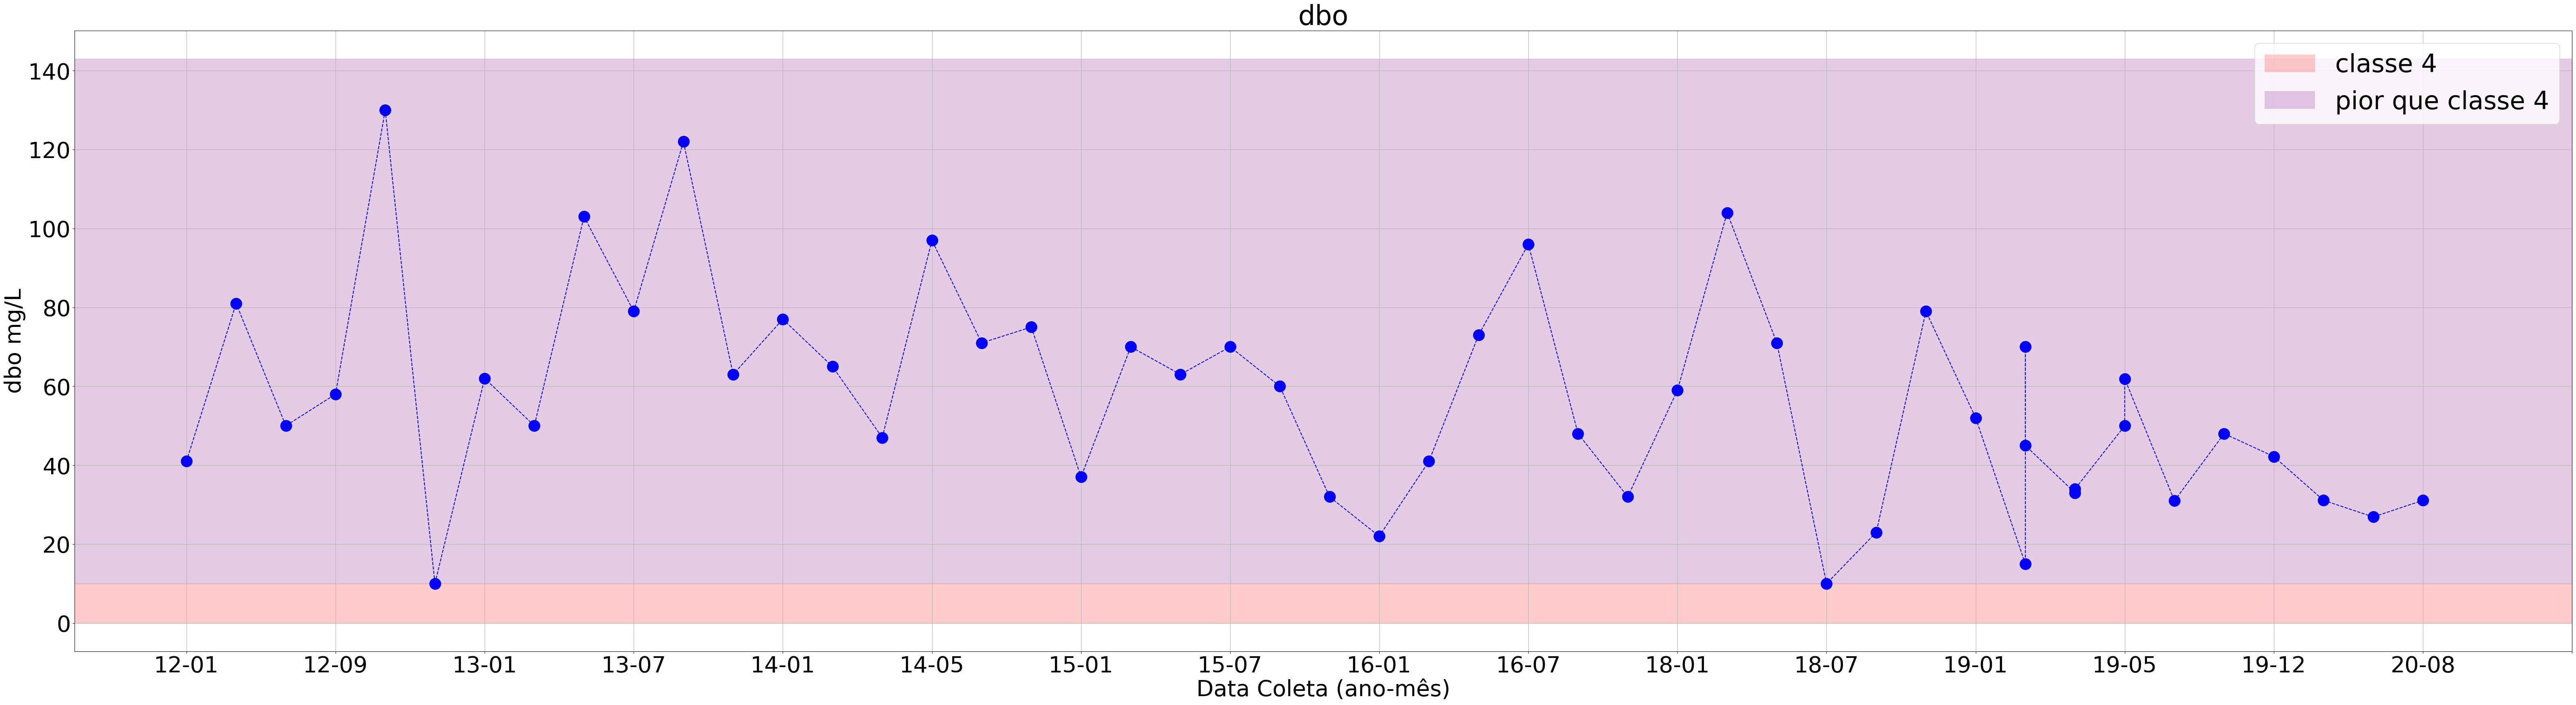

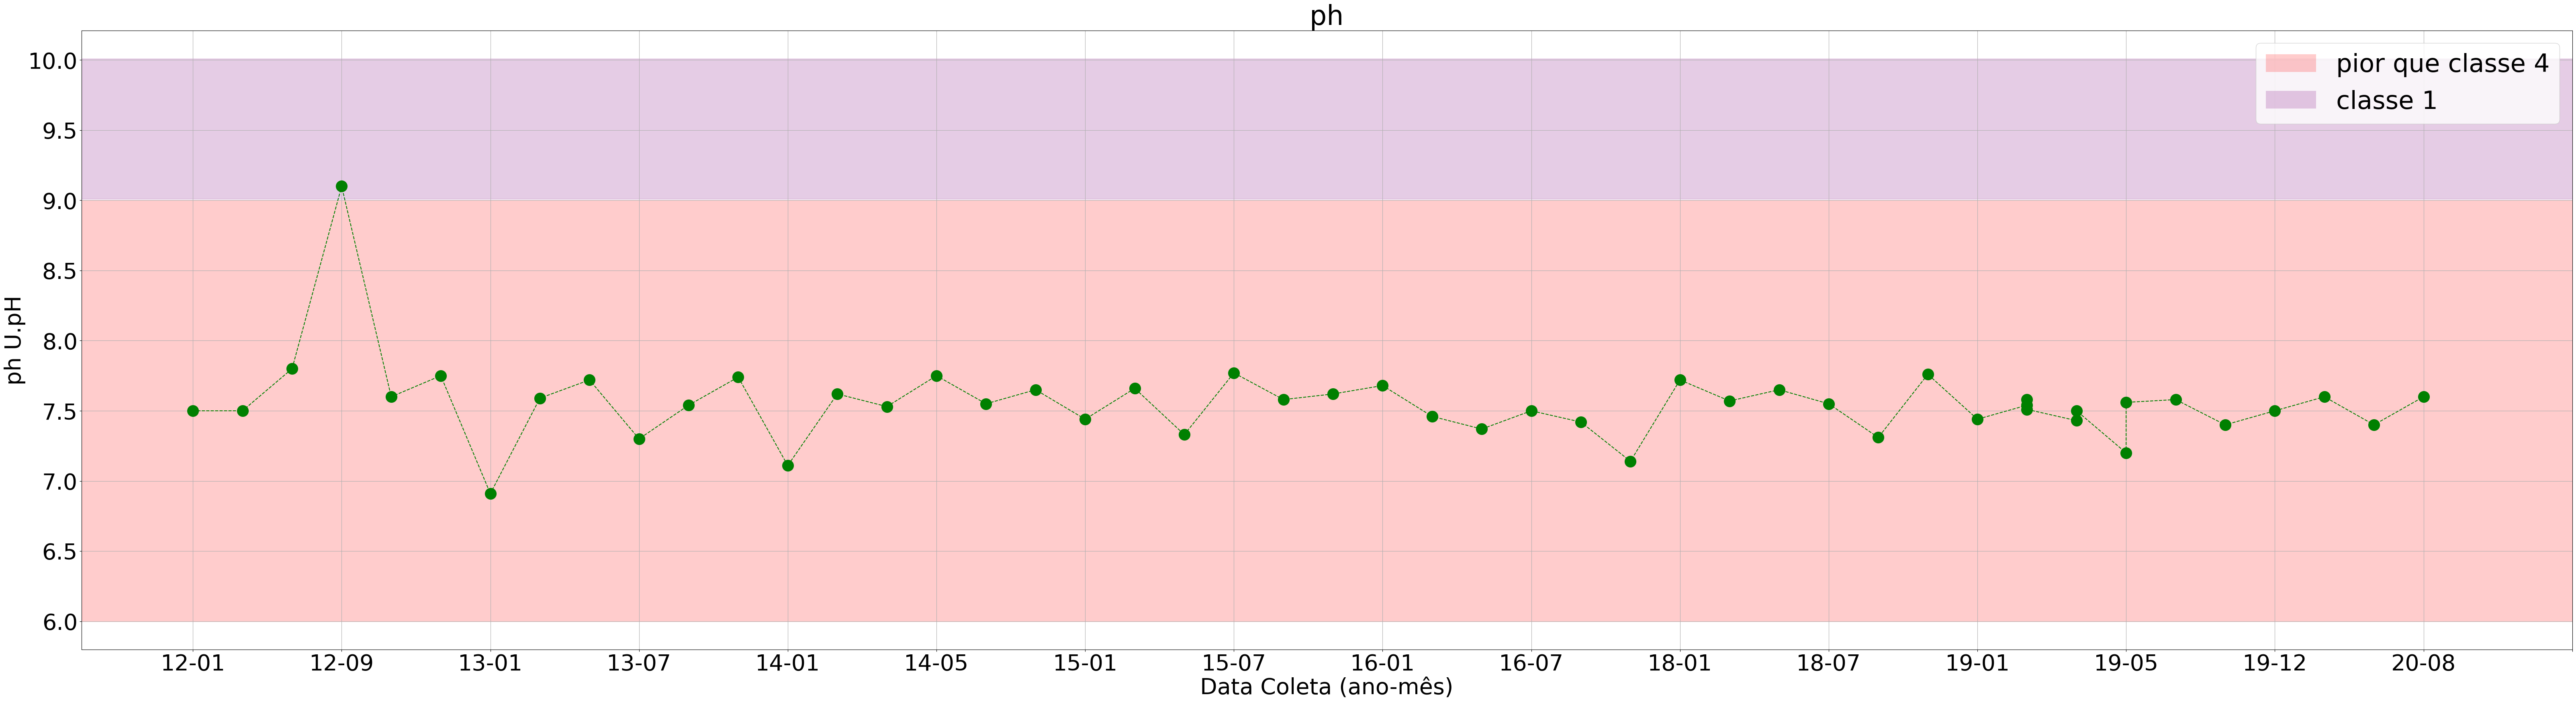

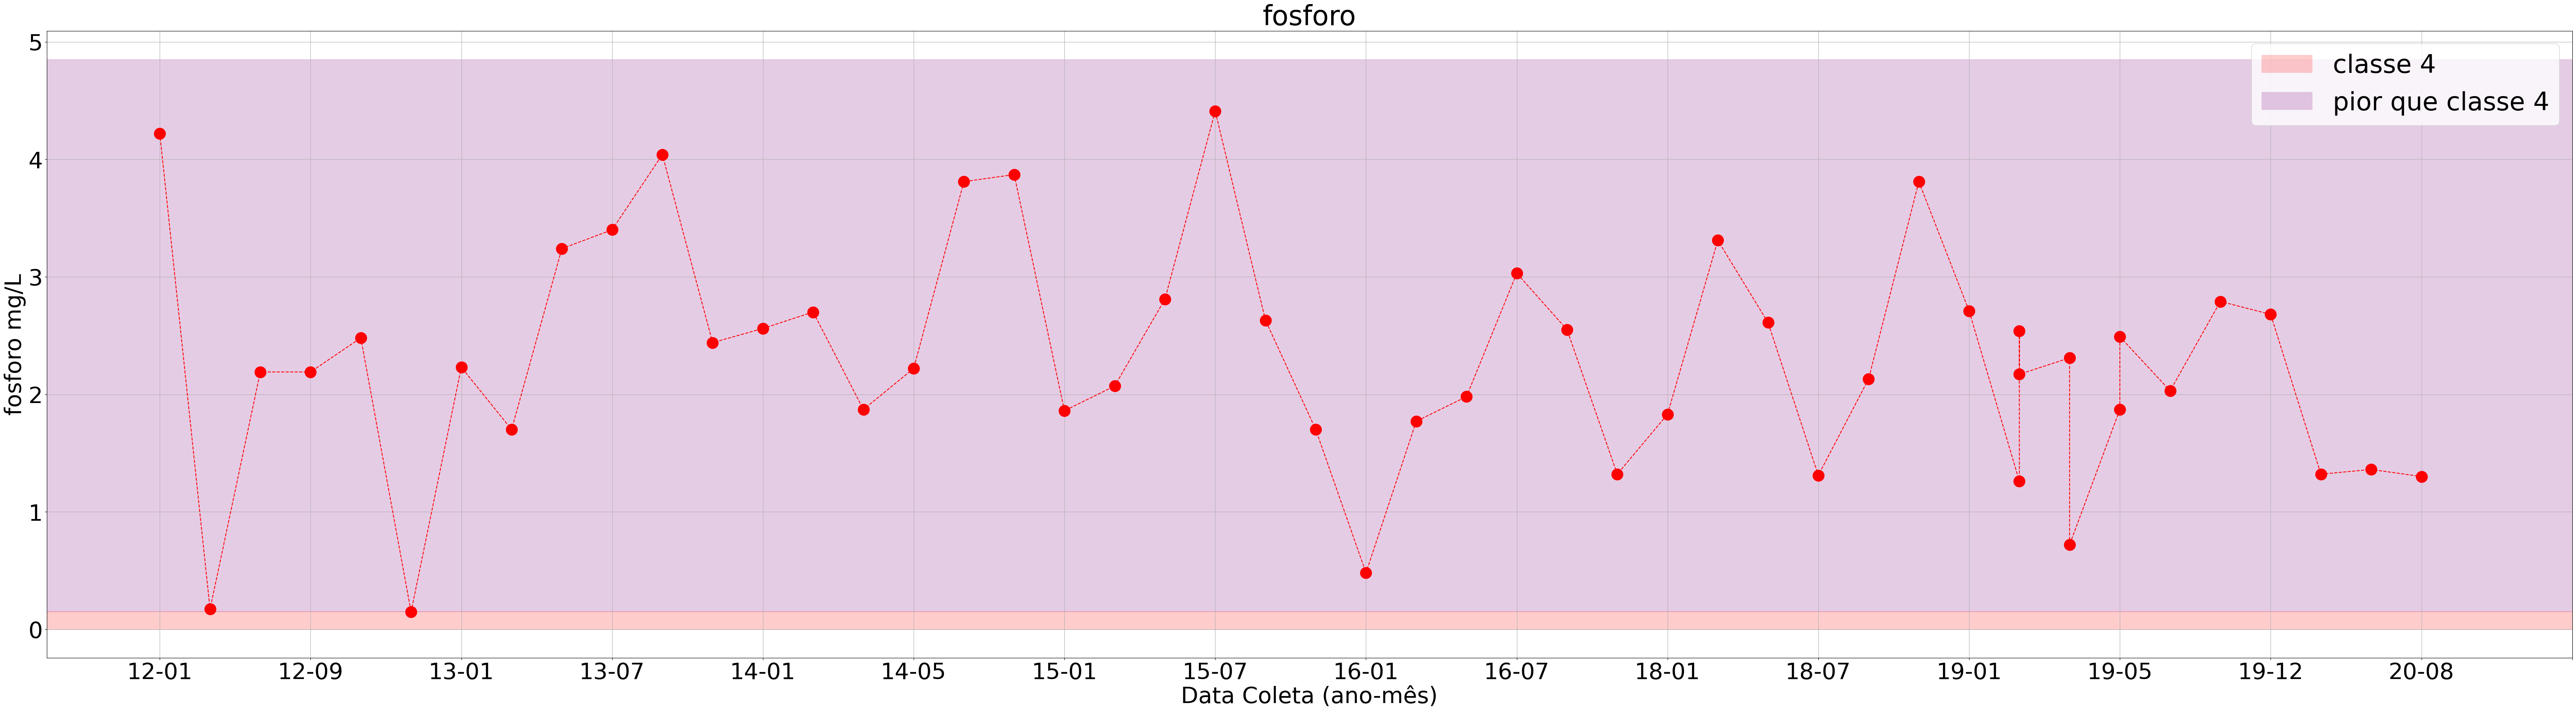

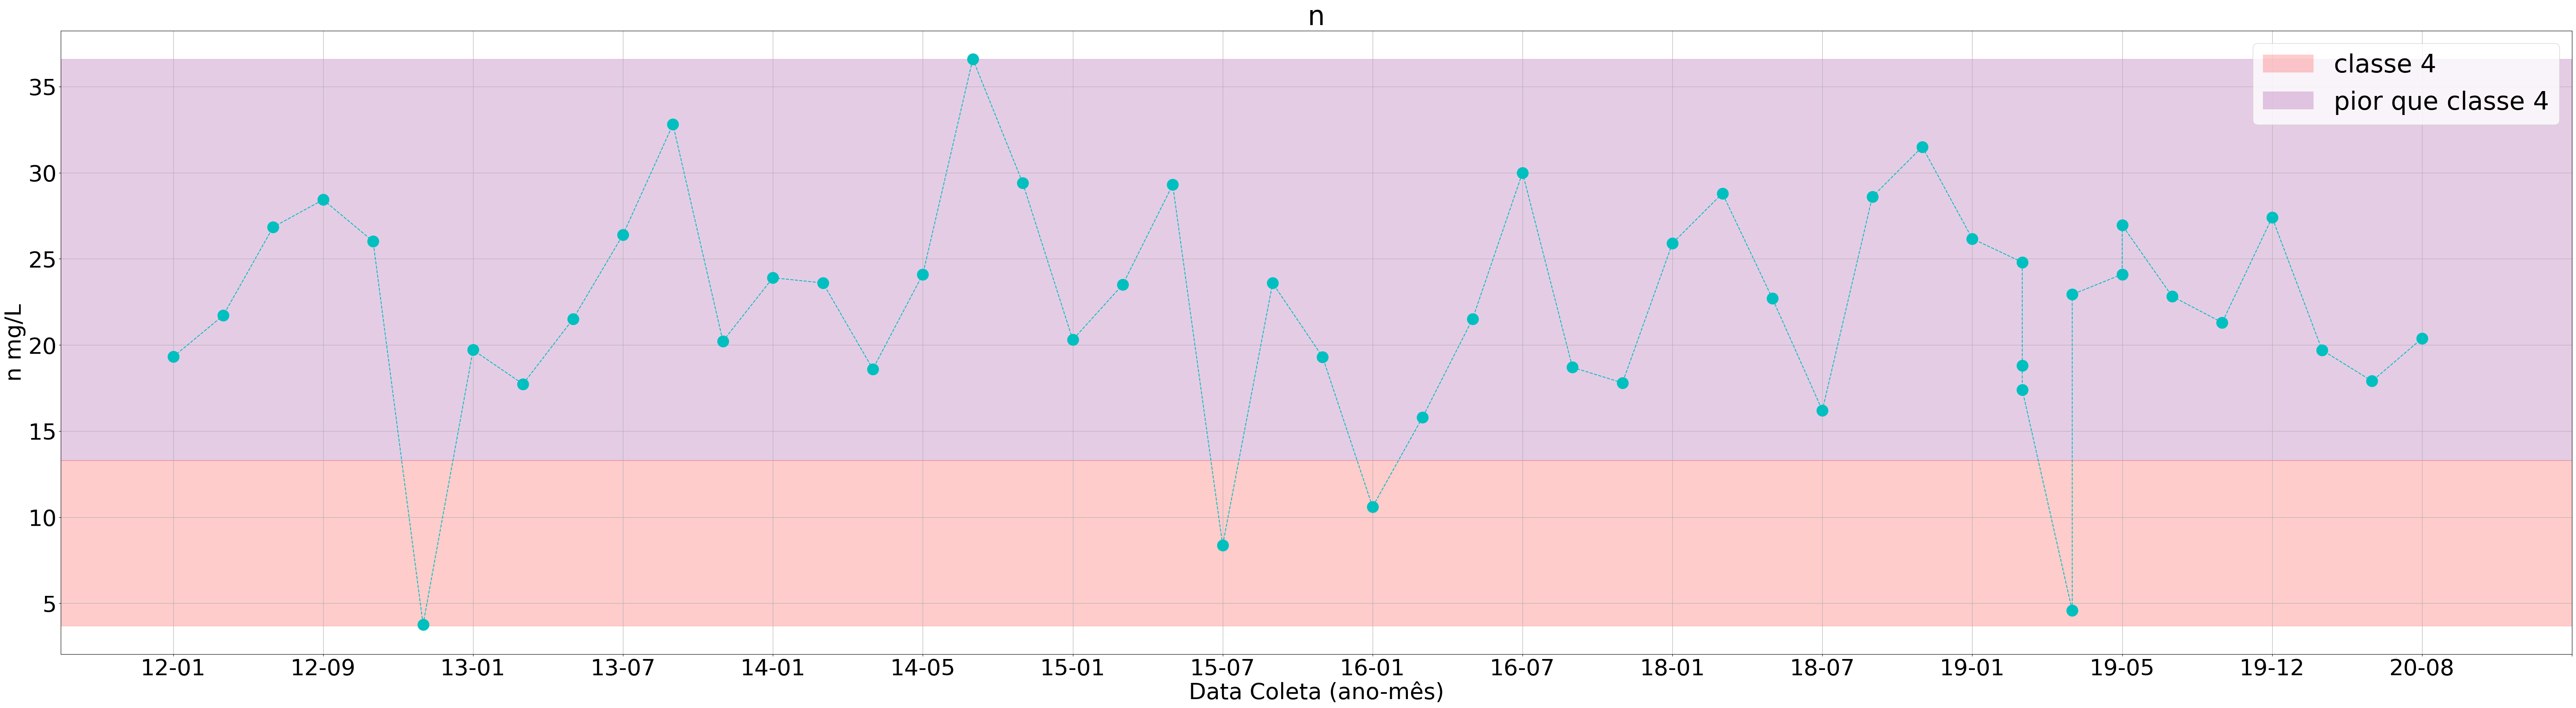

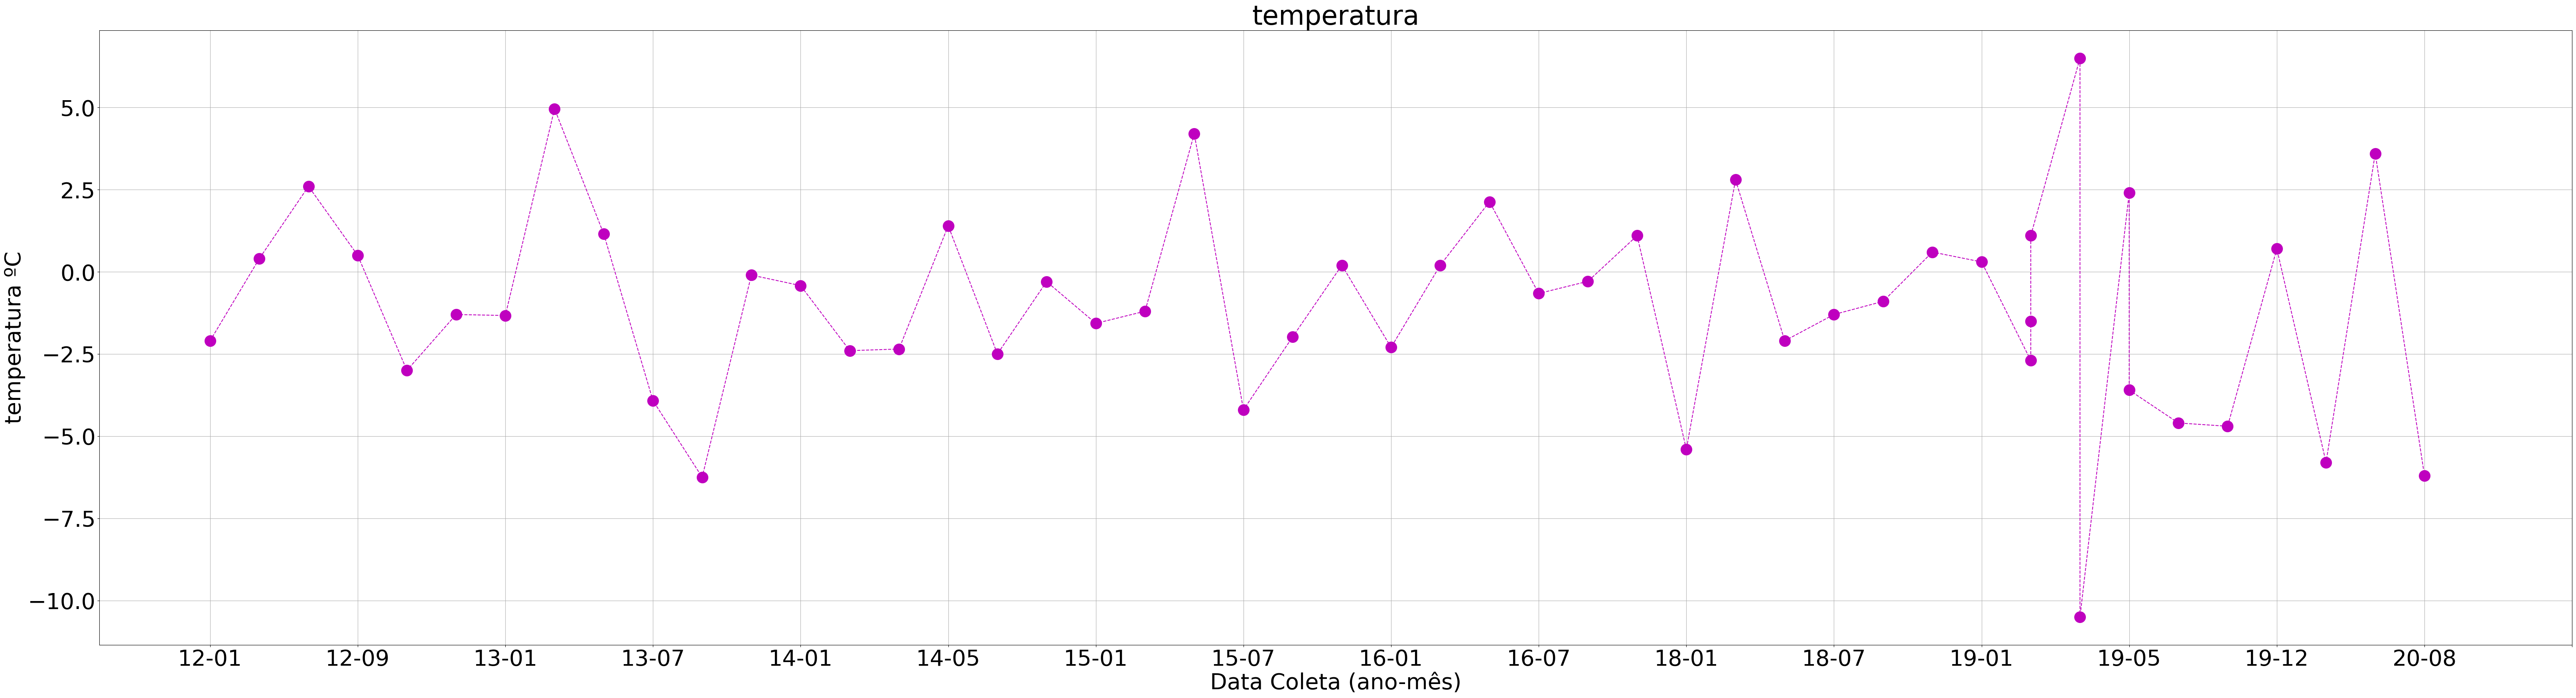

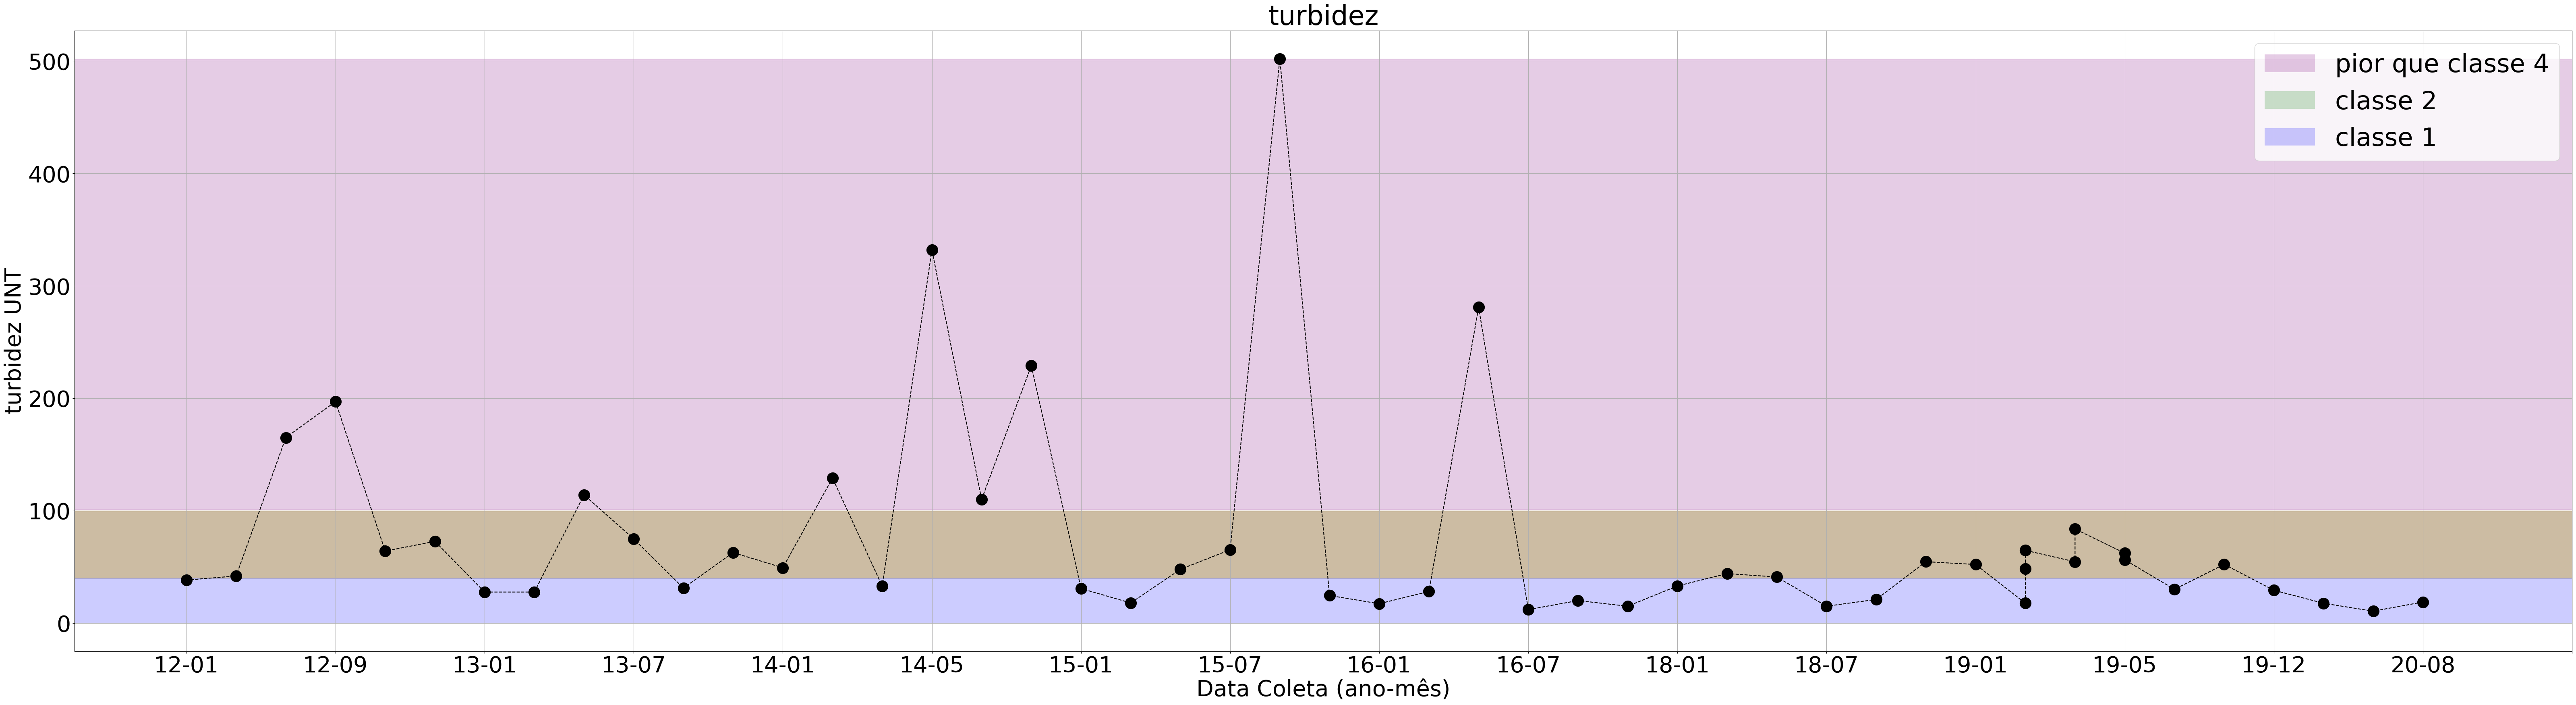

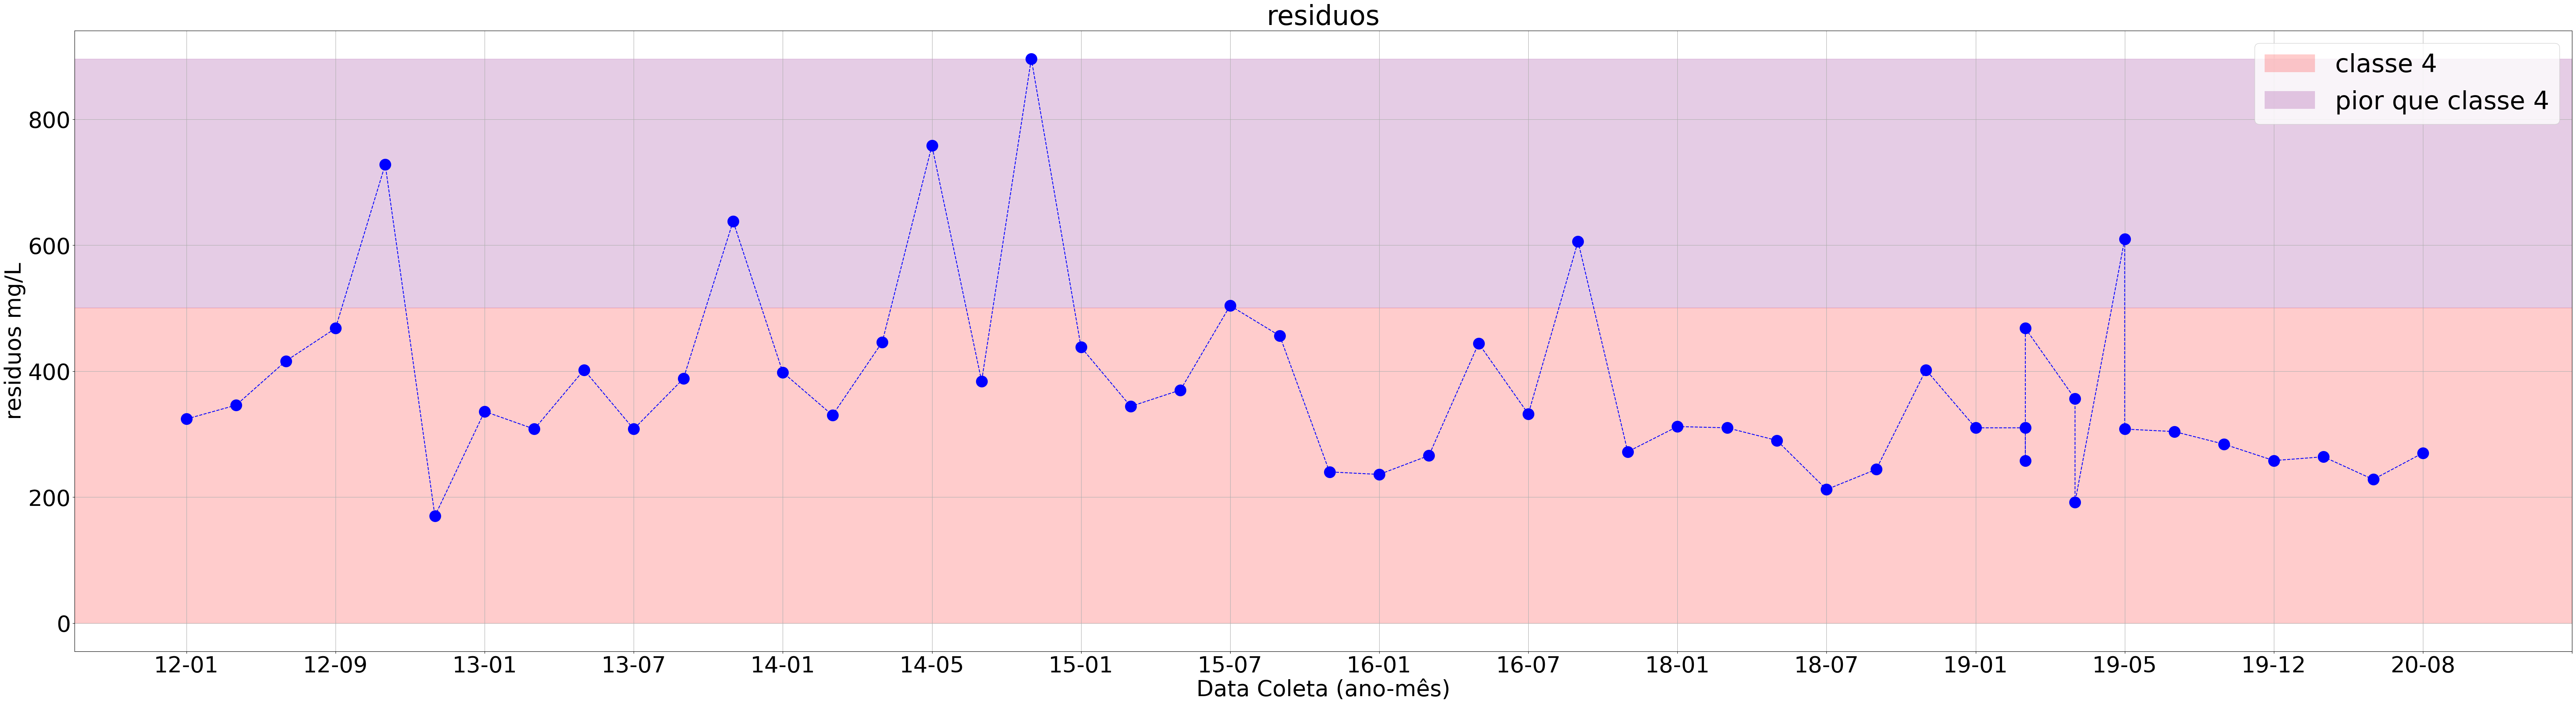

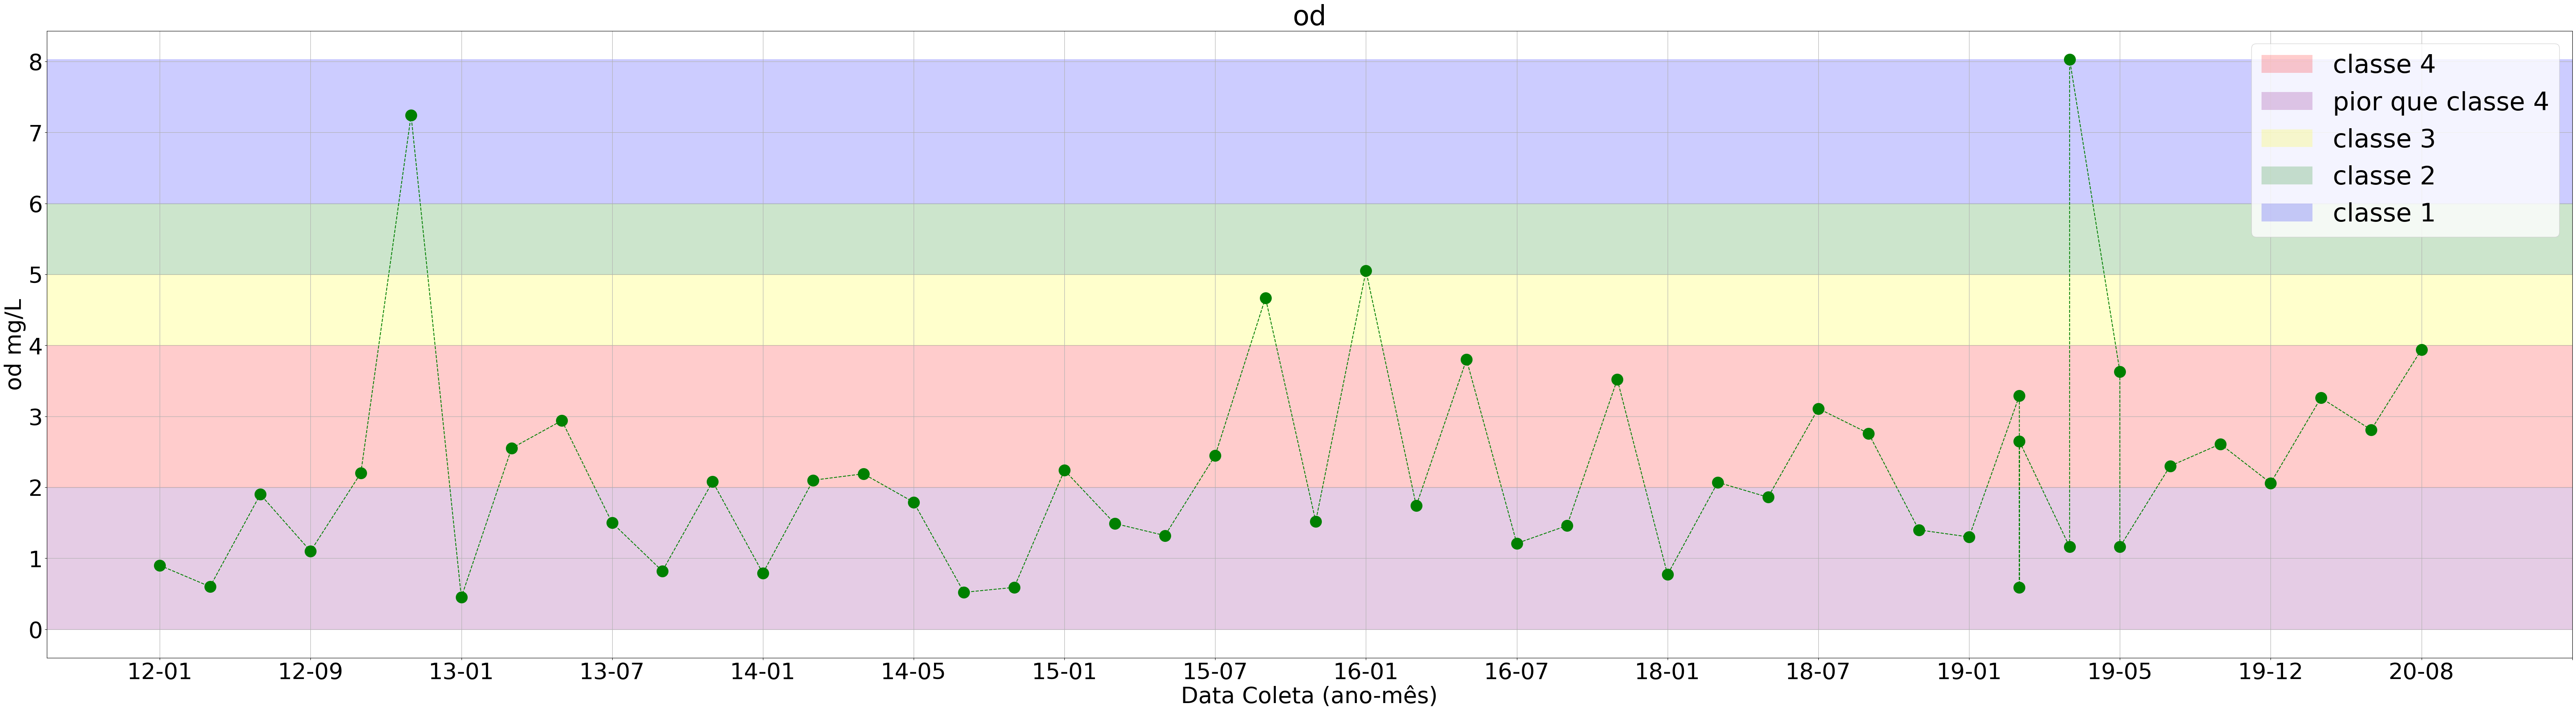

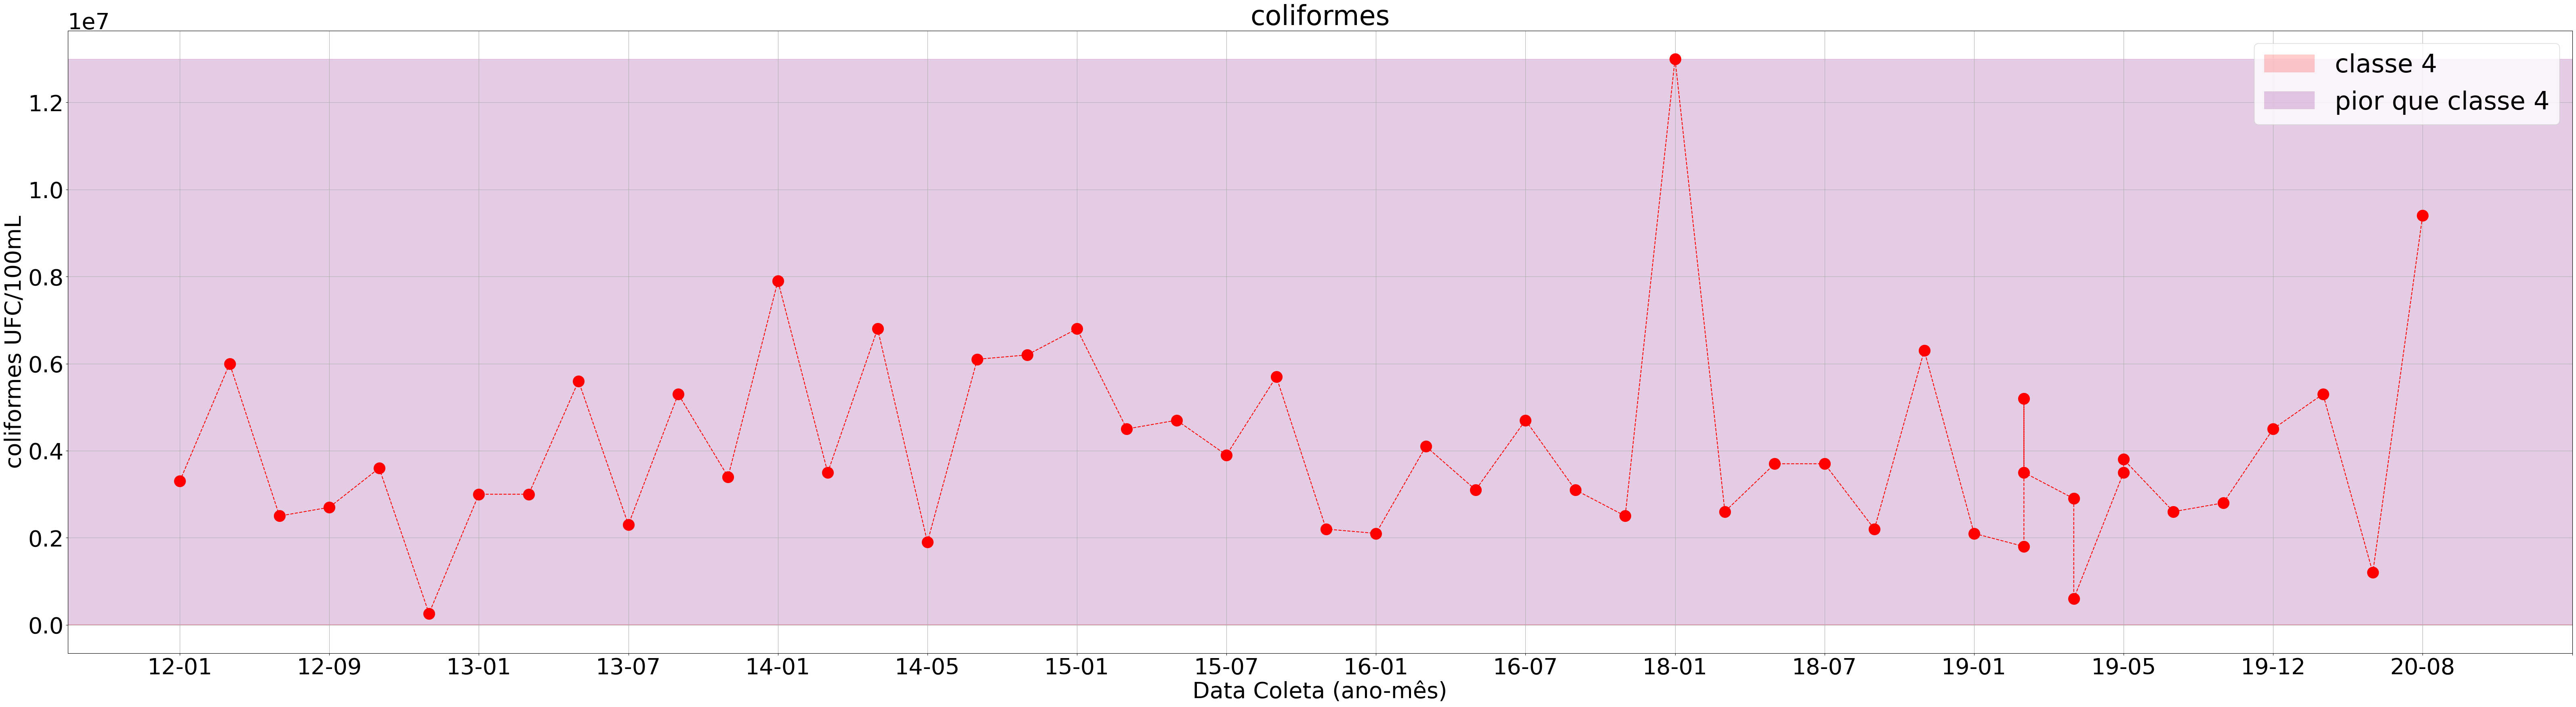

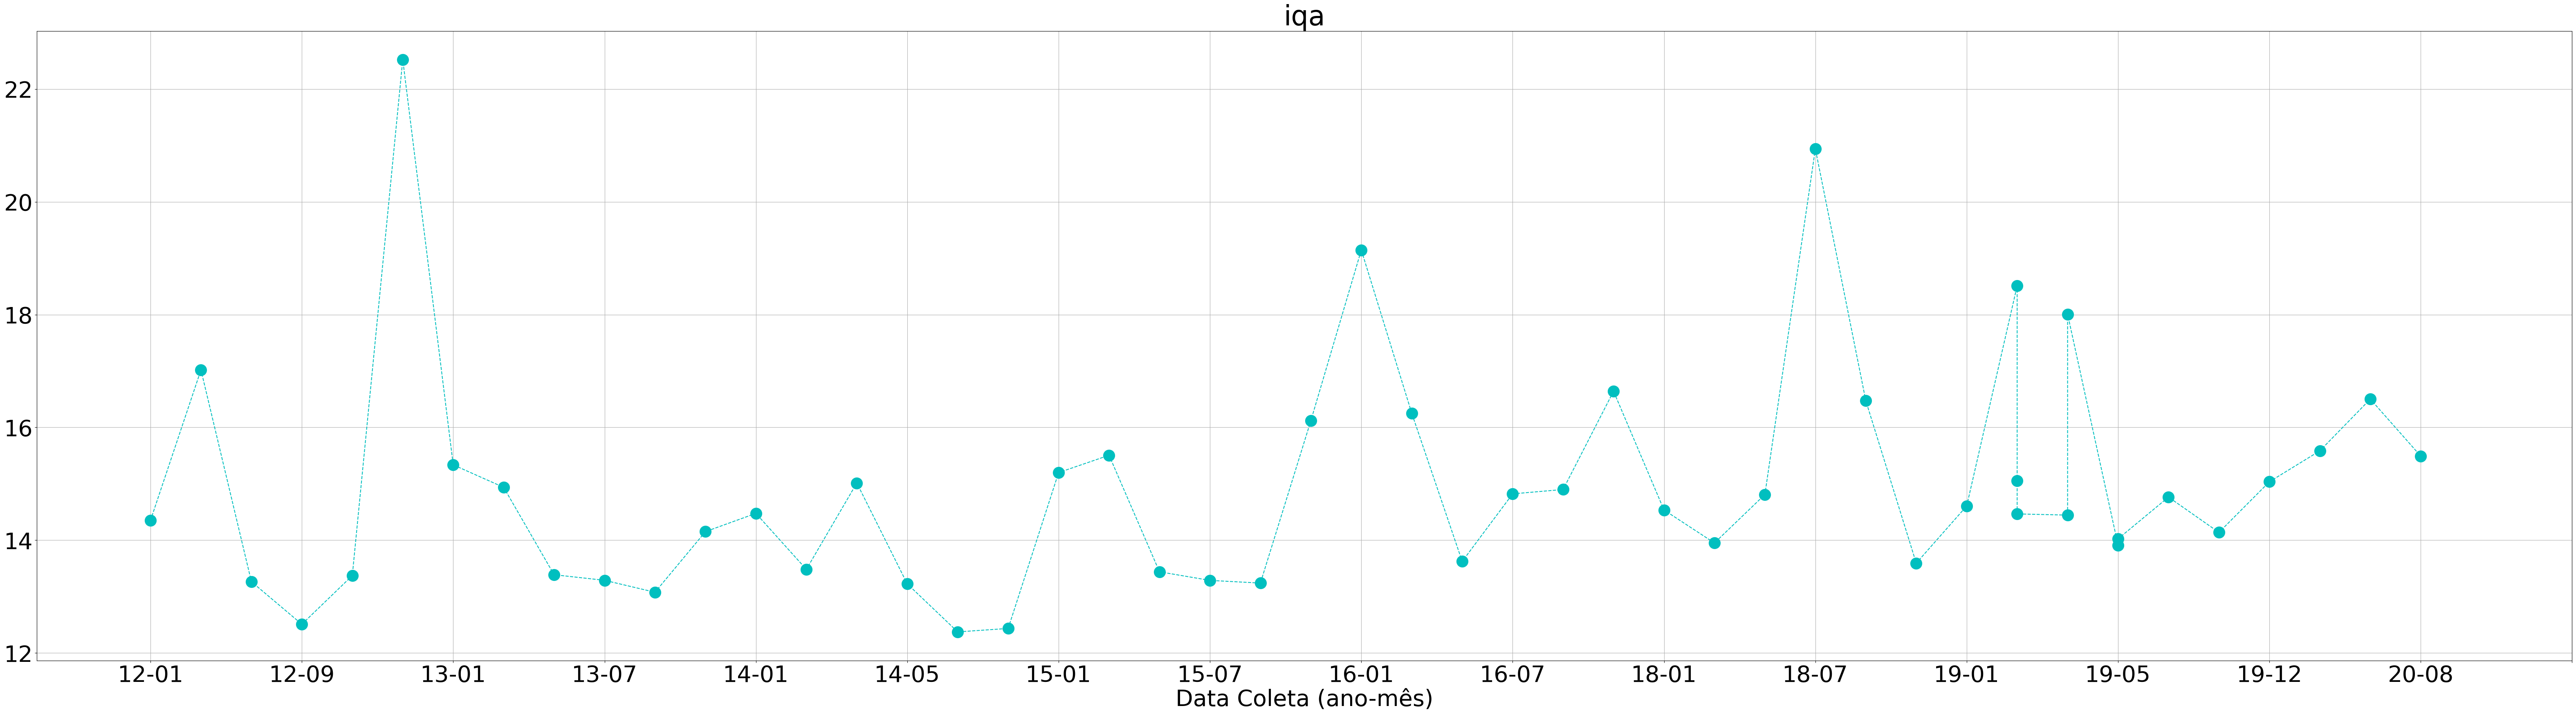

In [115]:
import itertools
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'k'])
import matplotlib.patches as mpatches

#make dict with max values for each col
max_vals = {}
for col in total_df.columns[1:11]:
    max_vals[col] = total_df[col].max()

plot_kwargs={'marker':'o','markersize':20, 'linestyle':'dashed'} #plottar intervalos corretos no eixo y, fazer intervalo do eixo y                                                                                                   pior que classe 4    classe 2  classe 1                                                         
classes = {"fosforo":[[0.151,max_vals['fosforo']*1.1],[0,0.15]], "ph":[[9.01,max_vals['ph']*1.1],[6,9]], "dbo":[[10.1,max_vals["dbo"]*1.1],[0,10]], "n":[[13.3,max_vals['n']],[3.7,13.3]], "temperatura":[[],[]], "turbidez":[[101,max_vals['turbidez']],[40,100],[0,40]], "residuos":[[501,max_vals['residuos']],[0,500]], "od":[[0,2],[2,4],[4,5],[5,6],[6,max_vals['od']]],"coliformes":[[2501,max_vals['coliformes']],[0,2500]]}

for col in total_df.columns[1:11]:
    #set xticks to be 3 months per year
    #increase font size
    plt.rcParams.update({'font.size': 40})
    plt.figure(figsize=(80,20),dpi=100)
    plt.title(col)
    
    plt.grid(True)
    plt.plot(total_df[total_df.columns[0]], total_df[col],**plot_kwargs,color=next(colors))
    plt.xlabel(total_df.columns[0]+(' (ano-mês)'))
    #plottando no maximo 3 meses por ano
    plt.xticks(np.arange(0, len(total_df[total_df.columns[0]]), 3))
    plt.ylabel(col+" "+unidades[col])

    #plotting classes ranges
    if col != 'temperatura' and col != 'iqa':
        plt.axhspan(ymin=classes[col][0][0], ymax=classes[col][0][1], color="purple", zorder=0, alpha=0.2, fill=True) #pior que 4
        plt.axhspan(ymin=classes[col][1][0], ymax=classes[col][1][1], color="red", zorder=0, alpha=0.2, fill=True) #classe 4

        label1 = 'classe 4'
        label2 = 'pior que classe 4'
        if col == 'ph':
            label1 = 'pior que classe 4'
            label2 = 'classe 1'
        if col != 'turbidez':
            red_patch = mpatches.Patch(color='red', label=label1, alpha=0.2, linewidth=0)
        purple_patch = mpatches.Patch(color='purple', label=label2, alpha=0.2, linewidth=0)
        handles = [red_patch, purple_patch]
        if col == 'od':
            plt.axhspan(ymin=classes[col][2][0], ymax=classes[col][2][1], color="yellow", zorder=0, alpha=0.2, fill=True) #classe 3
            label3 = 'classe 3'
            blue_patch = mpatches.Patch(color='yellow', label=label3, alpha=0.2, linewidth=0)
            handles.append(blue_patch)
            #classe 2
            plt.axhspan(ymin=classes[col][3][0], ymax=classes[col][3][1], color="green", zorder=0, alpha=0.2, fill=True)
            label4 = 'classe 2'
            green2_patch = mpatches.Patch(color='green', label=label4, alpha=0.2, linewidth=0)
            handles.append(green2_patch)
            #classe 1
            plt.axhspan(ymin=classes[col][4][0], ymax=classes[col][4][1], color="blue", zorder=0, alpha=0.2, fill=True)
            label5 = 'classe 1'
            blue2_patch = mpatches.Patch(color='blue', label=label5, alpha=0.2, linewidth=0)
            handles.append(blue2_patch)

        elif col == 'turbidez':
            plt.axhspan(ymin=classes[col][2][0], ymax=classes[col][2][1], color="blue", zorder=0, alpha=0.2, fill=True)
            plt.axhspan(ymin=classes[col][1][0], ymax=classes[col][1][1], color="green", zorder=0, alpha=0.2, fill=True)
            label1 = 'pior que classe 4'
            label2 = 'classe 2'
            label3 = 'classe 1'
            green_patch = mpatches.Patch(color='green', label=label2, alpha=0.2, linewidth=0)
            purple_patch = mpatches.Patch(color='purple', label=label1, alpha=0.2, linewidth=0)
            blue_patch = mpatches.Patch(color='blue', label=label3, alpha=0.2, linewidth=0)
            handles = [purple_patch,green_patch, blue_patch]



        plt.legend(handles=handles, loc='upper right', fontsize=45)
        plt.savefig('images/'+col+'.png')
    

  



plottando pior mes do ano para cada iqa

/tmp/ipykernel_21760/502659917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iqa_df['Data Coleta'] = iqa_df['Data Coleta'].apply(lambda x: datetime.datetime.strptime(x, "%y-%m"))


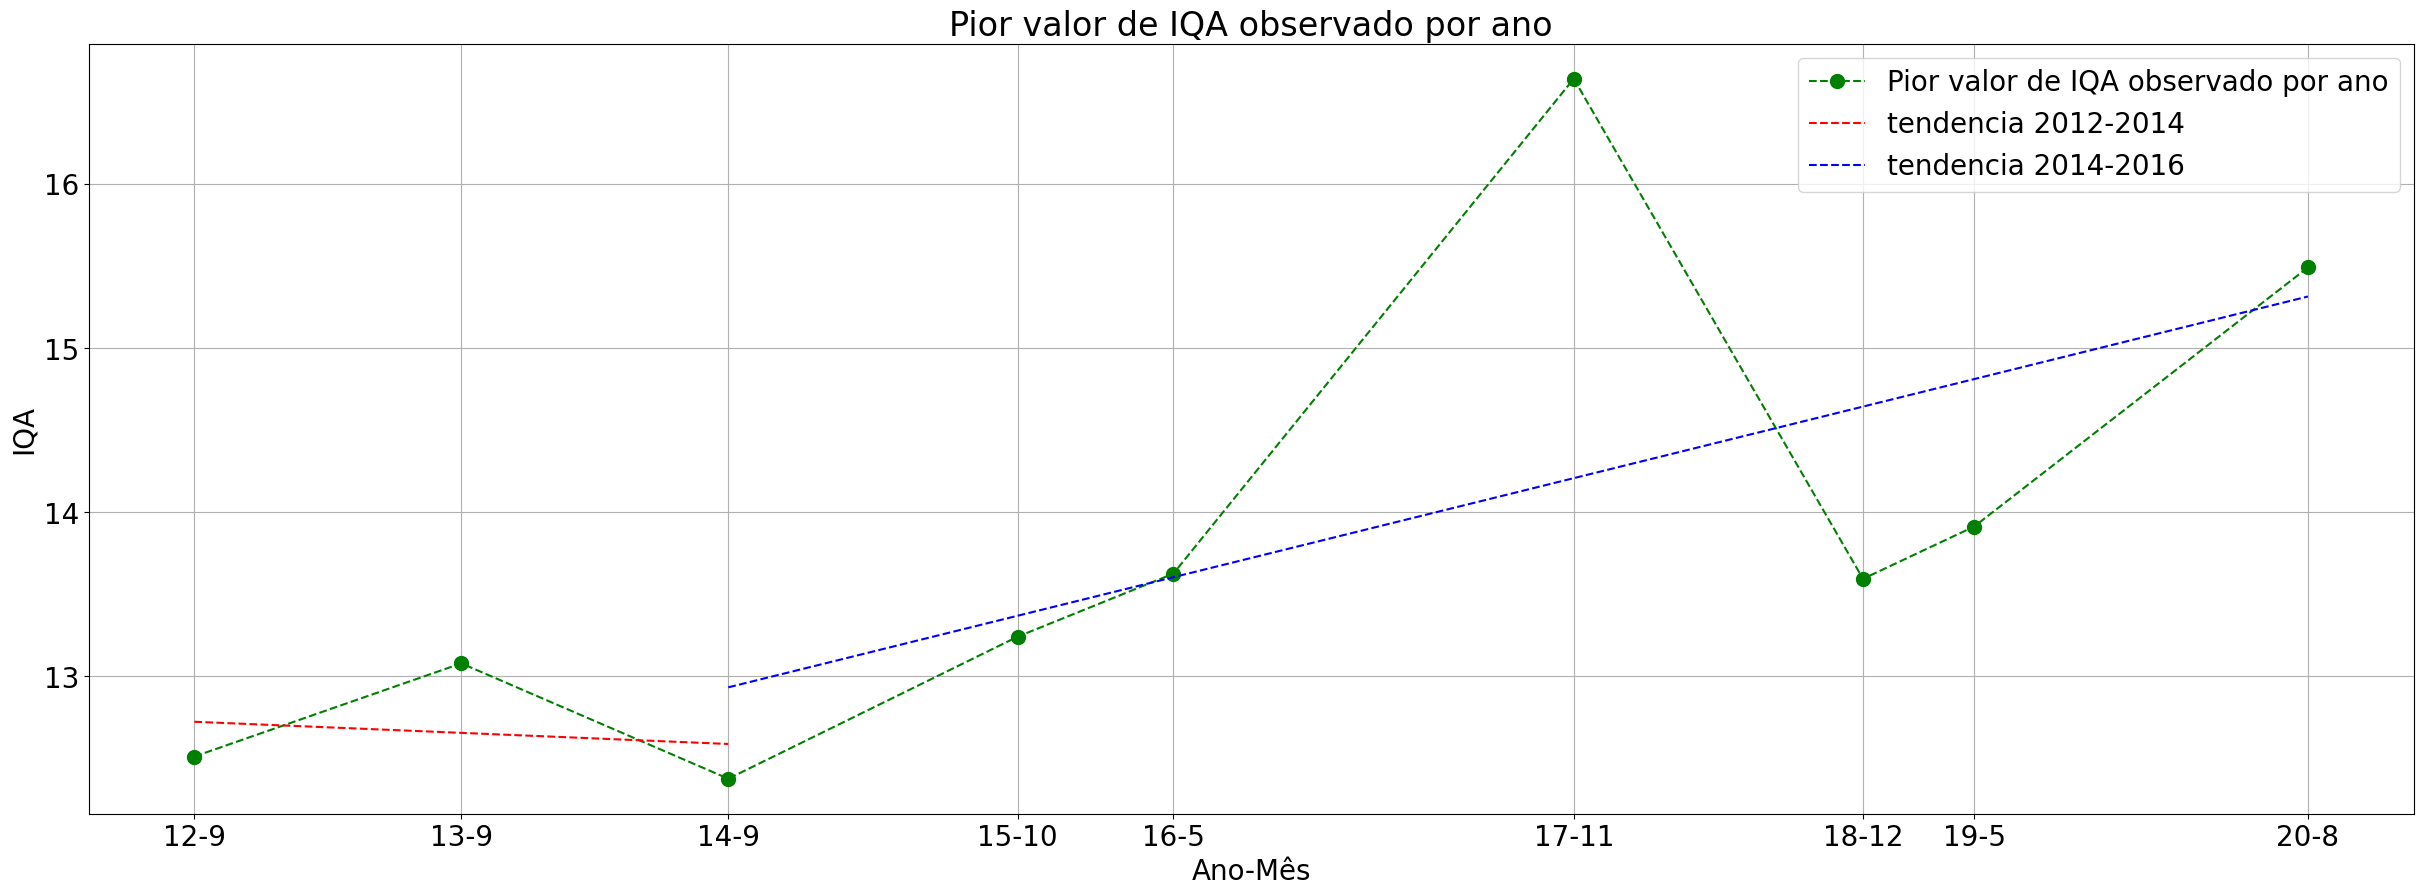

In [ ]:
#df de iqa
import datetime
iqa_df = total_df[['Data Coleta', 'iqa']]

#passar para datetime ano e mes
iqa_df['Data Coleta'] = iqa_df['Data Coleta'].apply(lambda x: datetime.datetime.strptime(x, "%y-%m"))


#grafico do pior valor observado de iqa para cada ano e seu mes de coleta
iqa_min_ano = iqa_df.groupby(iqa_df['Data Coleta'].dt.year)['iqa'].min()
iqa_min_month = iqa_df.loc[iqa_df.groupby(iqa_df['Data Coleta'].dt.year)['iqa'].idxmin(), 'Data Coleta'].dt.month

#plot on the x axis also the month of the year
new_keys = []
for i in range(len(iqa_min_month)):
    print()
    new_keys.append(str(iqa_min_ano.keys()[i])+'-'+str(iqa_min_month.values[i]))
    

#assign new keys to iqa_min ano
new_keys
#converter  new_keys para datetime
iqa_min_ano.index = new_keys
x = [datetime.datetime.strptime(x, "%Y-%m") for x in new_keys]
x_plot = [((i.year-2012)*12) + i.month for i in x]

x_fit_1 = [((i.year-2012)*12) + i.month for i in x[:3]]
y_fit_1 = iqa_min_ano.values[:3]

m,b = np.polyfit(x_fit_1, y_fit_1, 1)
p = np.poly1d([m,b])

valores_reg_1 = p(x_fit_1)


x_fit_2 = [((i.year-2014)*12) + i.month for i in x[2:]]
y_fit_2 = iqa_min_ano.values[2:]

m,b = np.polyfit(x_fit_2, y_fit_2, 1)
p = np.poly1d([m,b])

valores_reg_2 = p(x_fit_2)

#dataframe regressao
reg_df_1 = pd.DataFrame()
reg_df_1['x'] = iqa_min_ano.index[:3]
reg_df_1['y'] = valores_reg_1

reg_df_2 = pd.DataFrame()
reg_df_2['x'] = iqa_min_ano.index[2:]
reg_df_2['y'] = valores_reg_2

#plot iqa_min_ano
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(30,10),dpi=100)
plt.title('Pior valor de IQA observado por ano')
plt.grid(True)
plt.plot(x_plot,iqa_min_ano.values, color='g', marker='o', markersize=10, linestyle='dashed')
plt.plot(x_plot[:3], reg_df_1['y'], color='r',linestyle='dashed')
plt.plot(x_plot[2:], reg_df_2['y'], color='b',linestyle='dashed')
x_t_labels = [str(i)[2:] for i in iqa_min_ano.keys()]
plt.xticks(x_plot,x_t_labels)

#plottar linha de tendencia de 2012 a 2014


plt.legend(['Pior valor de IQA observado por ano', 'tendencia 2012-2014', 'tendencia 2014-2016'])
plt.xlabel('Ano-Mês')
plt.ylabel('IQA')
plt.savefig('images/iqa_min_ano.png')
